In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

from astropy.table import Table

import desispec.io
from desitarget.sv3 import sv3_targetmask 
import astropy

from astropy.cosmology import Planck18 as cosmo

import glob

In [2]:
specprod = 'fuji'    # Internal name for the EDR
specprod_dir = desispec.io.specprod_root(specprod)
print(specprod_dir)

/global/cfs/cdirs/desi/spectro/redux/fuji


In [3]:
bright_zcat_file = os.path.join(specprod_dir, 'zcatalog', 'ztile-sv3-bright-cumulative.fits')

In [4]:
bright_zcat = Table.read(bright_zcat_file)

In [5]:
#only bgs bright galaxies
bgs_bright_ii = (bright_zcat['SV3_BGS_TARGET'] & sv3_targetmask.bgs_mask["BGS_BRIGHT"])!=0
print(np.count_nonzero(bgs_bright_ii))
bgs_bright_zcat = bright_zcat[bgs_bright_ii]
print(len(bgs_bright_zcat))

259613
259613


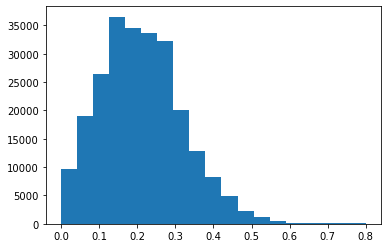

In [6]:
_ = plt.hist(bgs_bright_zcat['Z'], bins=np.linspace(0.0, 0.8, 20))

In [7]:
len(set(bgs_bright_zcat['TILEID']))

214

In [8]:
# The link between rosette and TILEID is here https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints

In [9]:
# here is the file from the LSS catalog
#lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_full.dat.fits')
lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_N_clustering.dat.fits')

In [10]:
lss_data

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.20458196461243,60.31535787110577,39633390185481345,1,100,0.08969256109731599,0.64,3.0,1.613220114177946,1.0,-1 .. -1,1.0,1.0,1.0,11.618794,18.39226,20.892622,13.421043,9.27371,0.5107507237961553,-0.10918667636401896,-0.12125347071681446,0.09189331428141073,0.11205224487489494,0.47852499884987515,-0.08700178426439652,-0.08700178426439652,-17.752532357564764,0.04785387196770399,0.0030775738791196166
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.64,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835,0.0009571040215082368,0.13371119385114222
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.64,3.0,1.7267282368438097,0.5,-6539912815536352385 .. 9025372152329235987,0.546875,1.0,1.8169014084507042,13.26433,27.728409,46.020153,37.03337,25.867756,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654,0.012707690463455164,0.01149153305805754
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.64,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267,0.004053776360776892,0.035160847734210195
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.64,3.0,1.5743490921284766,0.5,-8790991219464744880 .. -4387867067969646830,0.3203125,1.0,3.0714285714285716,6.782468,16.732075,29.996437,31.939342,25.343126,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361,0.004053776360776892,0.035160847734210195
186.48359894373857,61.73967570511937,39633407801558322,1,100,0.08577825488213503,0.64,3.0,1.6169466967221486,1.0,-6189309032222493180 .. 7718245232114193986,0.421875,1.0,2.3454545454545452,15.079609,20.454126,26.065075,13.486019,10.797623,0.34480053237283675,-0.10549431291824019,-0.11931835908501928,0.06879194820524737,0.061135194940372256,0.3386332394709298,-0.08320490723567098,-0.08320490723567098,-17.77278795503906,0.04785387196770399,0.0030775738791196166
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.64,3.0,1.6400346453345047,1.0,2333715480473687758 .. -1431821843982627288,0.4921875,1.0,2.015625,6.3314033,19.638945,38.222126,43.818123,28.204218,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533,0.009219810701767882,0.015770253951760238
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.64,3.0,1.6990866107210438,0.5,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.6300474905985266,-0.17874423352756497,-0.17874423352756497,-20.457178485102737,0.012707690463455164,0.01149153305805754
188.7298325265811,60.18104670445405

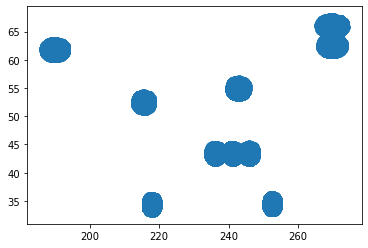

In [11]:
plt.scatter(lss_data['RA'], lss_data['DEC'])

In [12]:
list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')

In [13]:
list_rosette

array([ 3,  6,  7, 11, 12, 13, 14, 15, 18, 19])

2616 3


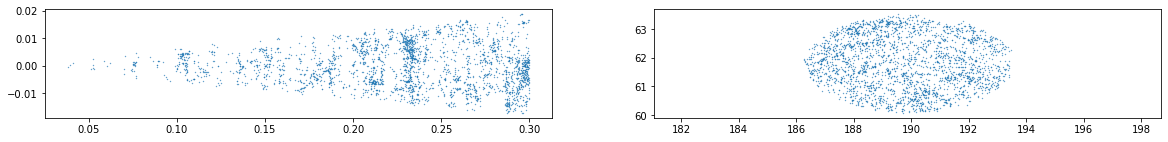

2149 6


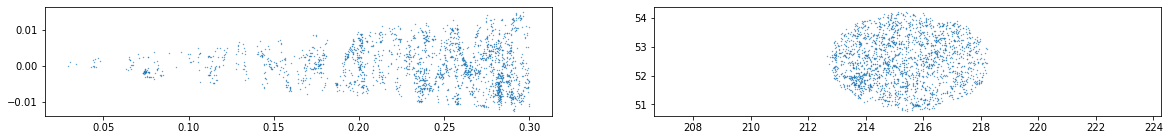

2314 7


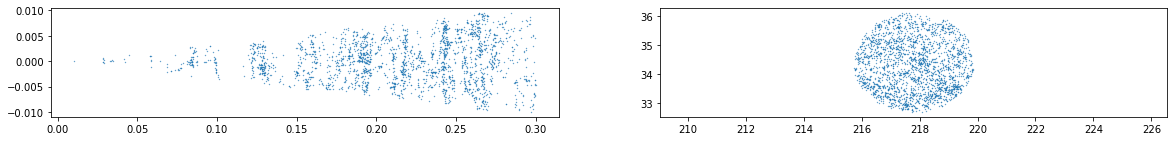

3237 11


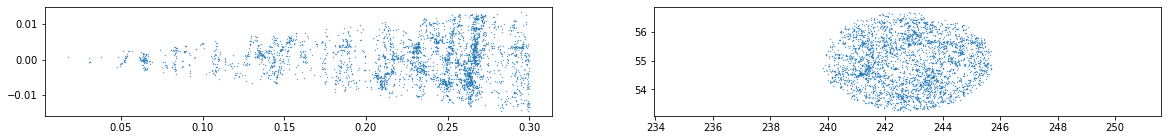

2506 12


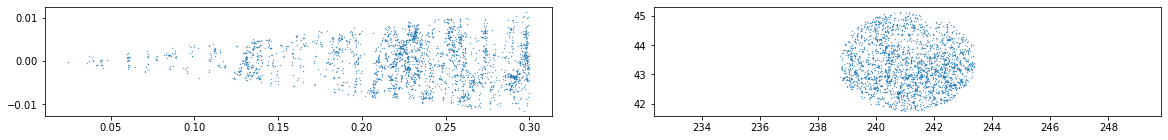

3565 13


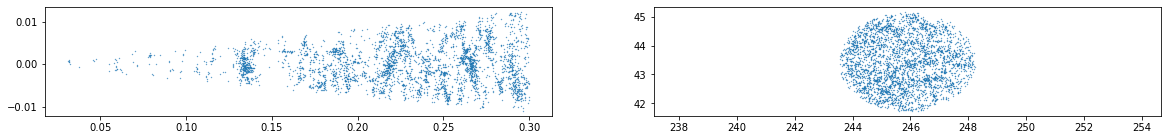

2073 14


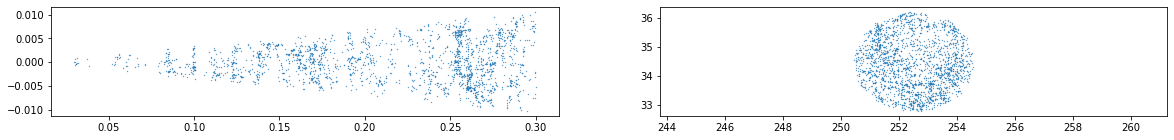

2151 15


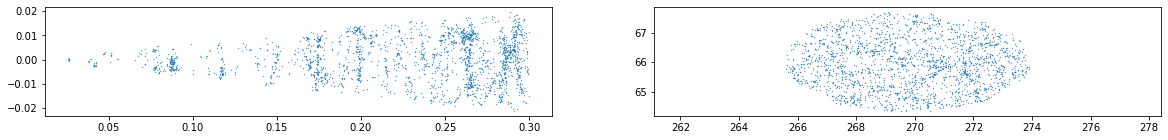

2188 18


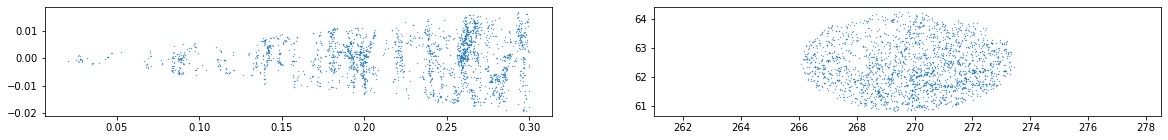

2266 19


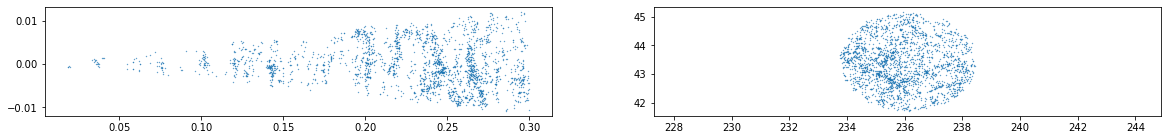

In [14]:
# Full description for the rosette footprints.
#https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints
for rosette_id in list_rosette:
    ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
    data_rosette = lss_data[ii] 
    print(len(data_rosette), rosette_id)
    plt.figure(figsize=(20,2))
    #plt.subplot(1,2,1)
    #plt.scatter(data_rosette['RA'], data_rosette['DEC'], alpha=0.1)
    #plt.subplot(1,2,2, adjustable='box')

    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.axis('equal')
    plt.show()

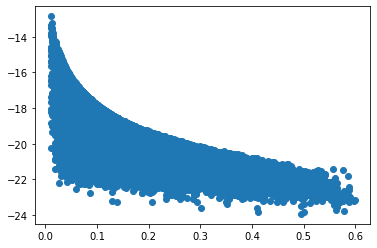

In [15]:
plt.scatter(lss_data['Z'], lss_data['ABSMAG_R'])

In [16]:
z_max_list = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

for z_max in z_max_list:
    ii = lss_data['Z']>z_max
    absmag_r_max = np.max(lss_data['ABSMAG_R'][ii])
    n_in_vol = np.count_nonzero((lss_data['Z']<=z_max) & (lss_data['ABSMAG_R']<absmag_r_max))
    print(z_max, absmag_r_max, n_in_vol)


0.1 -17.82851513520599 6348
0.2 -19.300668796745292 18265
0.25 -19.789899469823162 22463
0.3 -20.182618967034653 25065
0.35 -20.5119326826208 22766
0.4 -20.796349674149578 18972
0.5 -21.42129109990171 8348


In [17]:
# read some random
random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_N_0_clustering.ran.fits')

In [18]:
random

TARGETID,RA,DEC,NTILE,TILES,rosette_number,rosette_r,COMP_TILE,Z,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
int64,float64,float64,int64,bytes43,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287006861,217.053993747975,32.844339582840995,2,208-211,7,1.6750873838143794,1.0,0.18115679145762623,1.015748031496063,6.6309824,18.932077,35.924744,29.712479,19.276299,0.913697512951229,0.0012333256040872181,0.22658534268215497,0.2280468116260682,0.6059796980666337,0.7611166435887314,-0.17572208771389744,-0.17572208771389744,-19.45675412078314,0.012707690463455164,0.01149153305805754
327863312287006871,216.96105123277434,32.85843363693025,1,205,7,1.6924289577861624,0.36363636363636365,0.3624525260132444,1.0,3.9206953,16.545471,47.05639,96.634056,70.364136,0.8868703457149468,0.2667498075435105,0.9431691041625481,0.4940502618053929,1.3128088477039455,0.7445310564354318,-0.3515789502328471,-0.3515789502328471,-21.111559805379656,0.0013972681760458132,0.09561734123289738
327863312287006915,217.05116530360402,32.847663141703265,2,208-211,7,1.6728731797200223,1.0,0.3009988823837262,1.0,4.7546234,18.697203,42.036736,61.6634,40.48283,0.9167673988193118,0.17254855948451037,0.742431627584144,0.3993063207665398,1.12294222251721,0.763014565168275,-0.2919689159122144,-0.2919689159122144,-20.742069887517225,0.003713248311710263,0.03826194249707034
327863312287006987,217.0442969494446,32.86749656185846,4,202-205-208-211,7,1.6566218761348026,1.0,0.269749437606277,1.0,11.32772,27.69174,49.815468,60.47266,46.467403,0.6156013150497894,-0.002619240838966419,0.35229755629386134,0.2150089861993652,0.622131157387025,0.5633959409949574,-0.2616569544780887,-0.2616569544780887,-20.75094989331964,0.008313487102263754,0.017459485623234086
327863312287007608,217.05123979169434,32.85948789907687,3,205-208-211,7,1.6618672119726665,0.875,0.38642550584480345,1.0,5.126405,15.922154,32.868187,47.95785,36.34013,0.6500899520510693,0.1312660664496864,0.7116486790958827,0.3512462419400154,0.9942614139904594,0.5874573926468216,-0.3748327406694593,-0.3748327406694593,-21.073914999577774,0.0009571040215082368,0.13371119385114222
327863312287007688,216.98216862256743,32.86499544647257,2,205-211,7,1.6792381694892633,0.96,0.05474407320670259,1.0,84.82311,145.53484,214.5928,157.55905,95.49745,0.6358525777185176,-0.14666822215333003,-0.19638875031130065,0.0723410373068668,0.08094858586080028,0.5775245010066135,-0.05310175101050151,-0.05310175101050151,-18.870597597337188,0.0504667514780847,0.0029186997834375608
327863312287007980,216.99280256908355,32.85273945429143,1,205,7,1.6869210666857204,0.36363636363636365,0.040109717978985916,1.0,160.24985,276.7486,411.52878,368.69748,244.49443,0.6545562614810303,-0.16498447526276305,-0.22632097966371512,0.05530027966193296,0.057946664521764224,0.5905733722202469,-0.03890642643961634,-0.03890642643961634,-18.86622219446828,0.08453159877481627,0.0017445635962380836
327863312287008123,217.0097205677191,32.830868129084884,1,211,7,1.701539079552833,0.45714285714285713,0.10301862103966075,1.0,82.64186,210.44333,395.66196,338.20026,216.05219,1.0070327040615938,-0.09922116303776386,-0.09141469473607652,0.13528614852658283,0.30710619737553724,0.8430191235143268,-0.09992806240847092,-0.09992806240847092,-20.71579813702413,0.020758901725607407,0.007066106315277897
327863312287008353,217.0434195828927,32.83808660534789,2,208-211,7,1.6841780523815808,1.0,0.14433940320340033,1.0,54.22743,100.89277,159.01653,125.48583,87.38373,0.601318276631374,-0.07434922848462558,-0.0015647219128746004,0.14209043688551184,0.26302957914539926,0.5531636409432376,-0.14000922110729833,-0.14000922110729833,-20.691949869379126,0.024799977701634248,0.005921525235303553


In [19]:
list_rosette_random = np.array(list(set(random['rosette_number'])), dtype='int')
print(list_rosette_random)

[ 3  6  7 11 12 13 14 15 18 19]


3 8021 215721


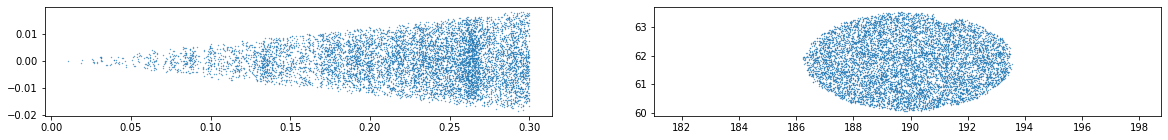

6 7873 215721


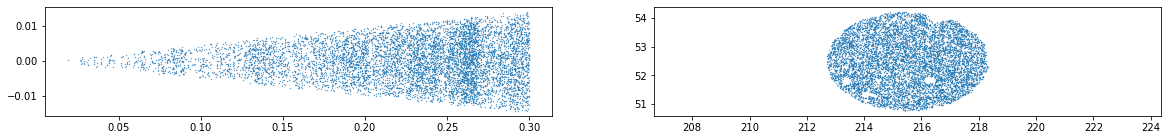

7 8074 215721


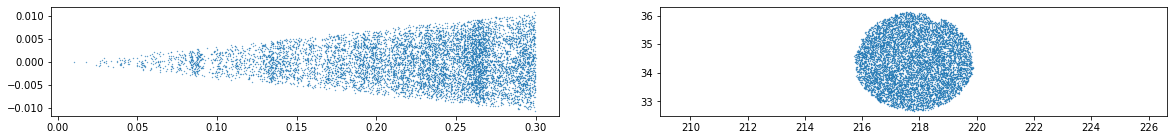

11 7919 215721


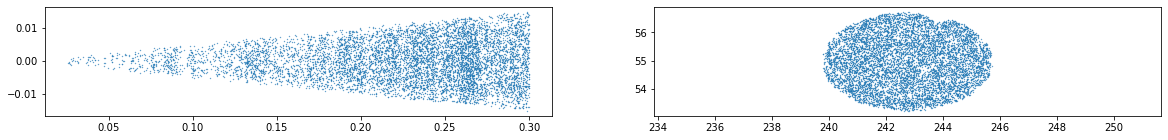

12 8013 215721


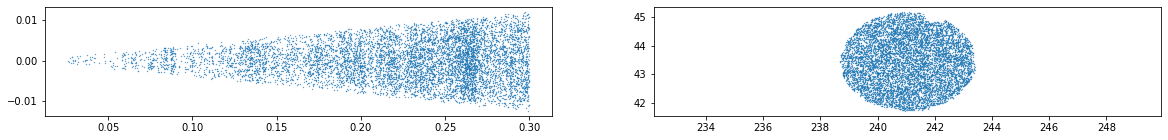

13 7894 215721


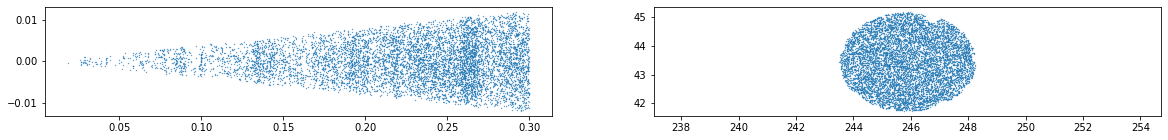

14 7794 215721


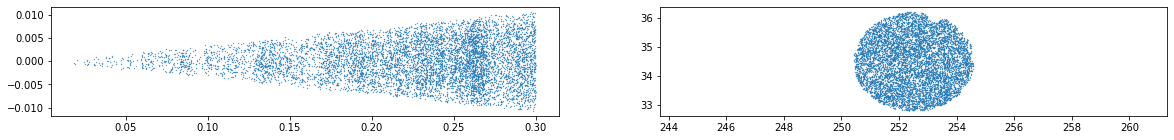

15 7744 215721


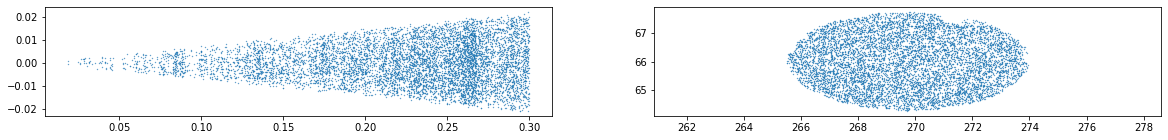

18 7820 215721


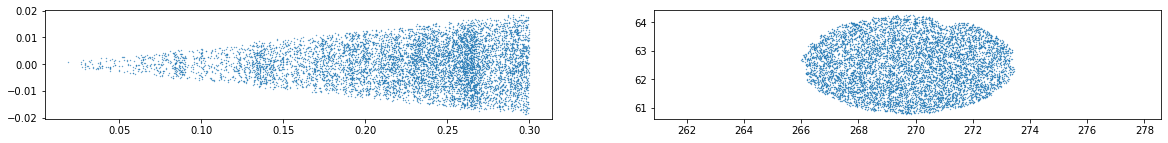

19 7960 215721


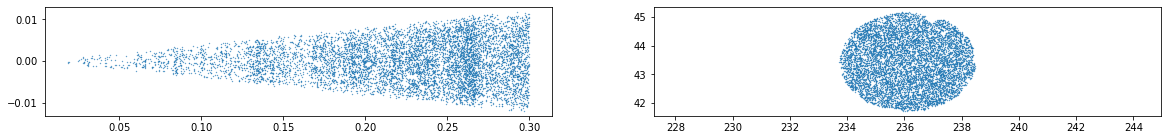

In [20]:
# Full description for the rosette footprints.
#https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints
for rosette_id in list_rosette_random:
    ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
    data_rosette = random[ii] 
    print(rosette_id, len(data_rosette), len(random))
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.axis('equal')
    plt.show()

2616 8133
../data/radec_rosette_3_data.csv ../data/radec_rosette_3_random_9.csv
2149 8000
../data/radec_rosette_6_data.csv ../data/radec_rosette_6_random_9.csv
2314 8015
../data/radec_rosette_7_data.csv ../data/radec_rosette_7_random_9.csv
3237 7861
../data/radec_rosette_11_data.csv ../data/radec_rosette_11_random_9.csv
2506 7931
../data/radec_rosette_12_data.csv ../data/radec_rosette_12_random_9.csv
3565 7899
../data/radec_rosette_13_data.csv ../data/radec_rosette_13_random_9.csv
2073 7788
../data/radec_rosette_14_data.csv ../data/radec_rosette_14_random_9.csv
2151 7926
../data/radec_rosette_15_data.csv ../data/radec_rosette_15_random_9.csv
2188 7732
../data/radec_rosette_18_data.csv ../data/radec_rosette_18_random_9.csv
2266 8184
../data/radec_rosette_19_data.csv ../data/radec_rosette_19_random_9.csv


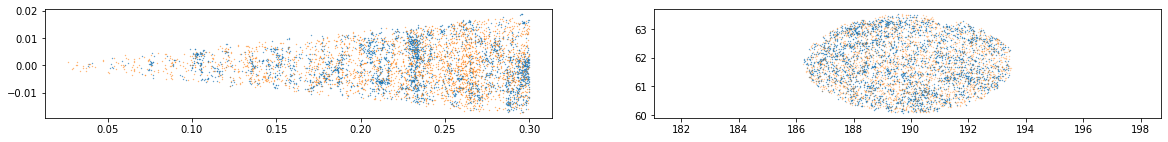

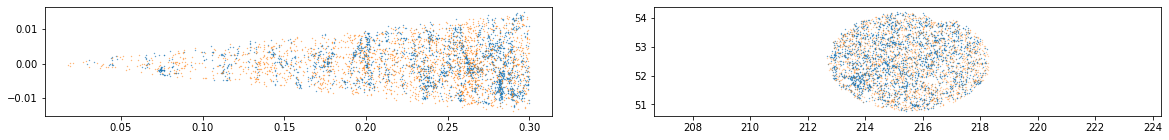

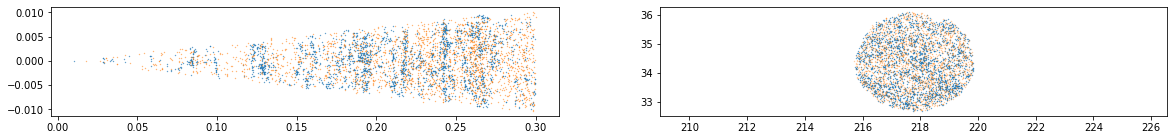

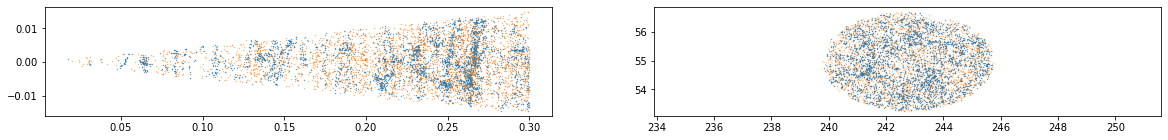

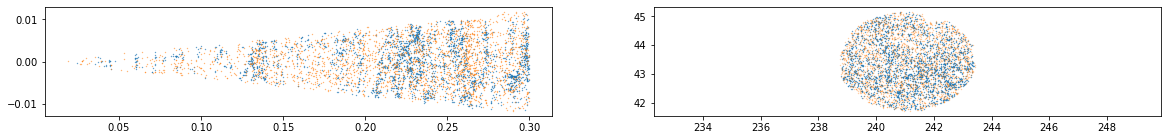

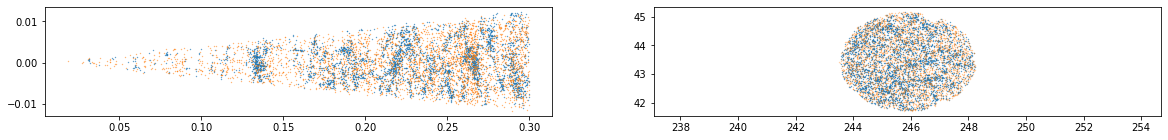

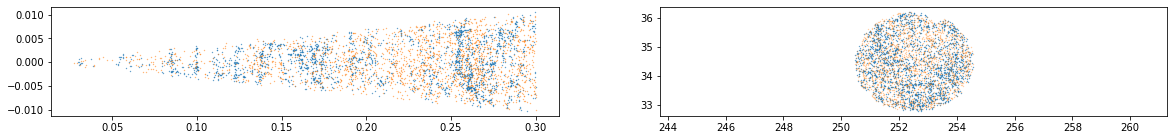

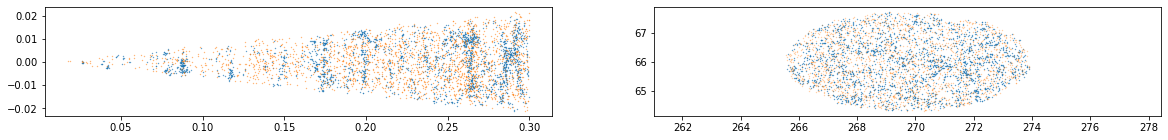

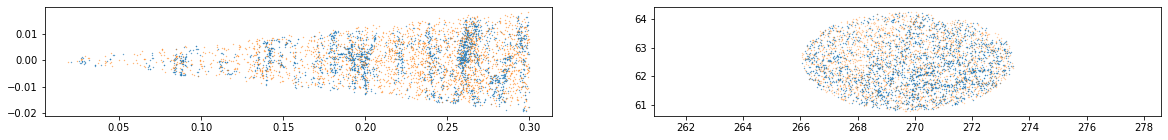

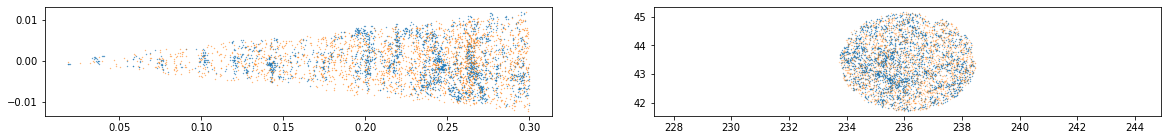

In [21]:
hemi = 'N'
rand_id = 9
lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_clustering.dat.fits'.format(hemi))
random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_{}_clustering.ran.fits'.format(hemi, rand_id))
max_z = 0.3
max_magabs_r = -20.1826
list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')
for rosette_id in list_rosette:
    
    ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
    data_rosette = lss_data[ii] 
    n_data = len(data_rosette)
    
    ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
    random_rosette = random[ii]
    n_random = len(random_rosette)
    random_ids = np.arange(n_random)
    select_random_ids = np.random.choice(random_ids, n_data, replace=False)
    random_rosette = random_rosette[select_random_ids]
    
    print(n_data, n_random)

    
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.scatter(random_rosette['Z'], 
                random_rosette['Z']*np.deg2rad(random_rosette['RA']-np.mean(random_rosette['RA'])), s=0.1, alpha=0.8)    
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.scatter(random_rosette['RA'], random_rosette['DEC'], s=0.1, alpha=0.5)
    plt.axis('equal')
    
    file_data = '../data/radec_rosette_{}_data.csv'.format(rosette_id)
    file_random = '../data/radec_rosette_{}_random_{}.csv'.format(rosette_id, rand_id)
    print(file_data, file_random)
    
    astropy.io.ascii.write(random_rosette[['RA', 'DEC', 'Z', 'TARGETID']], file_random, format='csv', overwrite=True)
    astropy.io.ascii.write(data_rosette[['RA', 'DEC', 'Z', 'TARGETID']], file_data, format='csv', overwrite=True)


In [22]:
def write_data_random(hemi='N', rand_id=0):
    lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_clustering.dat.fits'.format(hemi))
    random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_{}_clustering.ran.fits'.format(hemi, rand_id))
    max_z = 0.3
    max_magabs_r = -20.1826
    list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')
    for rosette_id in list_rosette:
    
        ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
        data_rosette = lss_data[ii] 
        n_data = len(data_rosette)
    
        ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
        random_rosette = random[ii]
        n_random = len(random_rosette)
        random_ids = np.arange(n_random)
        select_random_ids = np.random.choice(random_ids, n_data, replace=False)
        random_rosette = random_rosette[select_random_ids]
    
        #print(n_data, n_random)

    
        file_data = '../data/radec_rosette_{}_data.csv'.format(rosette_id)
        file_random = '../data/radec_rosette_{}_random_{}.csv'.format(rosette_id, rand_id)
        #print(file_data, file_random)
    
        astropy.io.ascii.write(random_rosette[['RA', 'DEC', 'Z', 'TARGETID','ABSMAG_R']], file_random, format='csv', overwrite=True)
        astropy.io.ascii.write(data_rosette[['RA', 'DEC', 'Z', 'TARGETID', 'ABSMAG_R']], file_data, format='csv', overwrite=True)


In [23]:
def convert_radecz_to_xyz(file_in):
    file_out = file_in.replace('radec_', 'xyz_')
    data_in = Table.read(file_in)
    data_in['R'] = np.array(cosmo.comoving_distance(data_in['Z']))
    
    x, y, z = astropy.coordinates.spherical_to_cartesian(data_in['R'], np.array(np.deg2rad(data_in['DEC'])), np.array(np.deg2rad(data_in['RA'])))
    data_in['X'] = x
    data_in['Y'] = y
    data_in['Z'] = z
    #print(file_out)
    #print(data_in)
    #plt.scatter(x,y, s=0.1)
    astropy.io.ascii.write(data_in[['X', 'Y', 'Z', 'TARGETID']], file_out, format='csv', overwrite=True)

In [24]:
for i in range(15):
    write_data_random(hemi='N', rand_id=i)
    write_data_random(hemi='S', rand_id=i)

In [25]:
files = glob.glob("../data/radec_*")
for file in files:
    convert_radecz_to_xyz(file)